In [20]:
#Importar librerias

import numpy as np
import pandas as pd
import sklearn
import time

from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#pip install imblearn
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


In [21]:
#Iniciarlizar tiempo para calculo de demora
start_time = time.time()

#Importar data
data = pd.read_csv('./data/CancelacionInfo.csv')

#Extraer features
features = np.array(data[['ReservationMonth','ChannelCode','TypeRoom', 'LeadTime', 'NumberRooms', 'NumNights', 'RoomRate']])

#Extraer variable dependiente
labels = np.array(data[['IsCancel?']])

#Divicion de informacion en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.3,
    random_state=42,
)

#hacer Oversample data (clase minoritaria)
#sm = SMOTE(random_state=12, ratio = 1.0)
#x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#Iniciarlizar modelo clasificador
clf = DecisionTreeClassifier()

#Entrenar modelo
clf.fit(X_train,y_train)

#Calculo de la eficiencia con data de prueba
score = clf.score(X_test, y_test)

#Calculo prediccion de prueba
Y_predict = clf.predict(X_test)

In [22]:
print("Tiempo de demora validacion simple : %s segundos" % (time.time() - start_time))
print("Eficiencia: ", str(score * 100), "%")
print("")
[validacion1, validacion2, validacion3]  = cross_val_score(clf, features, labels)
print("Tiempo de demora validacion cruzada :%s segundos" % (time.time() - start_time))
print("Eficiencia cruzada 1 : ", str(validacion1 * 100), "%")
print("Eficiencia cruzada 2 : ", str(validacion2 * 100), "%")
print("Eficiencia cruzada 3 : ", str(validacion3 * 100), "%")

Tiempo de demora validacion simple : 0.8948156833648682 segundos
Eficiencia:  59.427828348504555 %

Tiempo de demora validacion cruzada :0.9128053188323975 segundos
Eficiencia cruzada 1 :  54.03508771929825 %
Eficiencia cruzada 2 :  54.04454865181712 %
Eficiencia cruzada 3 :  64.71277842907386 %


In [23]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (1792, 7)
X_test:  (769, 7)
y_train:  (1792, 1)
y_test:  (769, 1)


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Y_predict)
print(confusion_matrix)

[[150 141]
 [171 307]]


Text(0.5, 257.44, 'Predicted label')

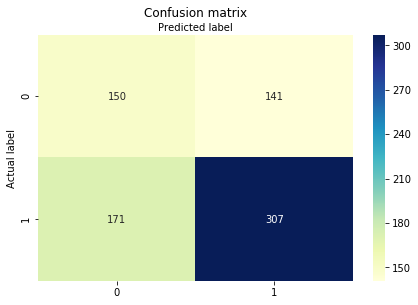

In [25]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, Y_predict))
print("Precision:",metrics.precision_score(y_test, Y_predict))
print("Recall:",metrics.recall_score(y_test, Y_predict))
print("f-score:",metrics.f1_score(y_test, Y_predict))

Accuracy: 0.5942782834850455
Precision: 0.6852678571428571
Recall: 0.6422594142259415
f-score: 0.6630669546436286


In [27]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.47      0.52      0.49       291
           1       0.69      0.64      0.66       478

   micro avg       0.59      0.59      0.59       769
   macro avg       0.58      0.58      0.58       769
weighted avg       0.60      0.59      0.60       769



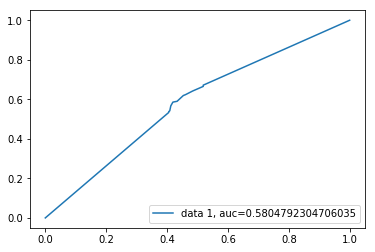

In [28]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()